## Lecture 17 Homework

Write a program to find the ground state of LJ potential for N=3 (assuming $\epsilon$ = $\sigma$ = 1)

[Reference](http://doye.chem.ox.ac.uk/jon/structures/LJ/tables.150.html)


In [1]:
%matplotlib inline
#matplotlib notebook


import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import requests
from scipy.optimize import minimize
from time import time
from pytictoc import TicToc


# Plot text color, uncomment 'black' for a light background
COLOR = 'white'
#COLOR = 'black'

plt.rcParams['axes.facecolor']= '#373e4b'
plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


t = TicToc()

In [2]:
def LJ(r, sigma=1, epsilon=1):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

def LJ2(r, sigma=1, epsilon=1):
    s6 = sigma**6
    r6 = r**6
    s12 = sigma**12
    r12 = r**12
    return 4*epsilon*(s12/r12 - s6/r6)

r = np.linspace(1.0,3.0,10000000)

energies = LJ(r)

Energy = 3*min(energies)

print('Groundstate Potential for 3 atoms:', Energy)

Groundstate Potential for 3 atoms: -2.999999999999889


In [3]:
t.tic()
energies = LJ(r)

Energy = 3*min(energies)
t.toc()
print(Energy)

Elapsed time is 1.515860 seconds.
-2.999999999999889


In [4]:
t.tic()
energies = LJ2(r)

Energy2 = 3*min(energies)
t.toc()
print(Energy2)

Elapsed time is 1.558310 seconds.
-2.999999999999888


In [5]:
def total_energy(positions, display=False):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):  
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            if display:
                print('pos1:  ', pos1)
                print('pos2:  ', pos2)
                print(i,j, dist)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

def LJ_Global_Min(N_atom=8,
                  N_attempts=10, 
                  solver='CG', 
                  hist=False, 
                  details=False,
                  Length=3,
                  tolerance=0.01):

    f_values = []
    x_values = []
    
    #published values for 8, 10, & 13 atoms
    LJN_Energy = {3: -3.000000,
                  8: -19.821489,
                  10: -28.422532,
                  13: -44.326801}
    

    t = time() #timimg function
    # calculates the mins
    for i in range(N_attempts):
        pos = init_pos(N_atom, L=Length)
        res = minimize(total_energy, pos, method=solver, tol=1e-4)
        f_values.append(res.fun)
        x_values.append(res.x)
        if i%10==0:
            print('step: ', i, '  values:', res.fun)

    global_min = min(f_values)

    elapsed = time() - t

    print('The global minimum:  ', global_min)
    if N_atom in LJN_Energy: 
        print('Published Minimum:   ', LJN_Energy[N_atom])

    global_min = min(f_values)

    if details:
        counter = 0

        for n in f_values:
            #print(n)
            if abs(LJN_Energy[N_atom] - n) <= tolerance:
                counter +=1
                #print('counted')

        stat = counter/len(f_values)*100
        dis = 'The Global minimum is reached ' + str(stat) + '% out of ' + str(len(f_values)) +' attempts.'
        # print(counter)
        print(dis)
        print('With an elapsed time of ', elapsed ,'seconds with solver', solver)
    
    if hist:
        plt.title('LJ cluster:  '+ str(N_attempts)+ ' runs;  for N = ' + str(N_atom)+' atoms')
        plt.hist(f_values,50)
        plt.show()
        
    return global_min, elapsed



In [6]:
N_attempts = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
N_atom = [8, 10, 13]
solver = ['Nelder-Mead',  #0
          'Powell',       #1
          'CG',           #2
          'BFGS',         #3
          'Newton-CG',    #4
          'L-BFGS-B',     #5
          'TNC',          #6
          'COBYLA',       #7
          'SLSQP',        #8
          'trust-constr', #9
          'dogleg',       #10
          'trust-ncg',    #11
          'trust-exact',  #12
          'trust-krylov'] #13

step:  0   values: -2.9999485253489784
step:  10   values: -2.999990923726141
step:  20   values: -2.999982387889096
step:  30   values: -2.999999662602685
step:  40   values: -2.036476377137338
step:  50   values: -2.0475458259137733
step:  60   values: -1.0144584972027408
step:  70   values: -2.999998451337161
step:  80   values: -1.0238653958343784
step:  90   values: -2.9999988138814846
step:  100   values: -2.9999731434183503
step:  110   values: -1.0105448512416677
step:  120   values: -2.174677833559637
step:  130   values: -2.999999870318545
step:  140   values: -2.999996453405079
step:  150   values: -2.9999998934429235
step:  160   values: -2.9999416110234183
step:  170   values: -2.999999032513105
step:  180   values: -2.999997924277139
step:  190   values: -2.999999953965688
The global minimum:   -2.9999999992715267
Published Minimum:    -3.0
The Global minimum is reached 30.0% out of 200 attempts.
With an elapsed time of  3.395000457763672 seconds with solver L-BFGS-B


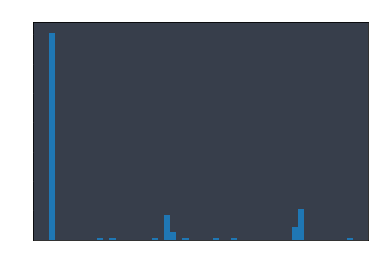

(-2.9999999992715267, 3.395000457763672)

In [7]:
LJ_Global_Min(N_atom=3, 
              N_attempts=2*N_attempts[10], 
              solver=solver[5], 
              details=True, 
              hist=True, 
              Length=3,
              tolerance=0.000001)